In [2]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [6]:
wine = load_wine()

In [8]:
wine.data.shape

(178, 13)

In [9]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [10]:
#实例化
#训练集带入实例化后的模型进行训练 使用的接口是fit
#使用其他接口将测试集导入训练好的模型，去获取结果(score,Ytest)

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(wine.data,wine.target,test_size=0.3)

In [16]:
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)

clf=clf.fit(Xtrain,Ytrain)
rfc=rfc.fit(Xtrain,Ytrain)

score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)

print("Single Tree:{}".format(score_c),
     "Random Forest:{}".format(score_r))

Single Tree:0.9074074074074074 Random Forest:1.0


F:\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
#交叉验证
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

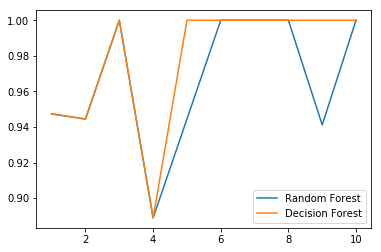

In [21]:
rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(rfc,wine.data,wine.target,cv=10)

plt.plot(range(1,11),rfc_s,label="Random Forest")
plt.plot(range(1,11),clf_s,label="Decision Forest")
plt.legend()

0.9888888888888889 11


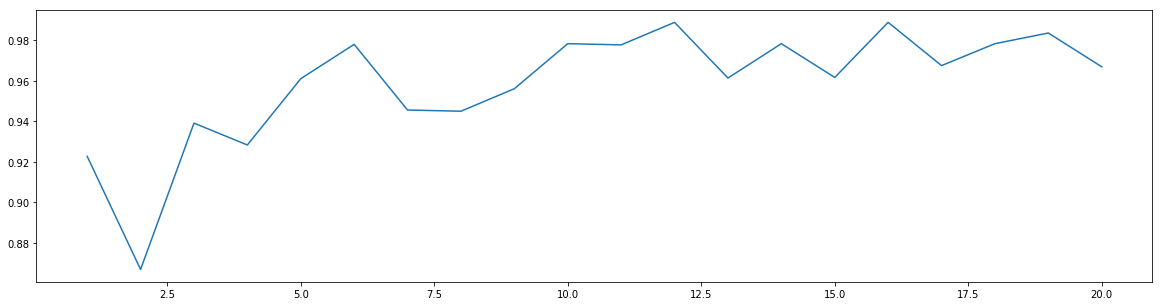

In [24]:
superpa = []
for i in range(20):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,21),superpa)
plt.show()

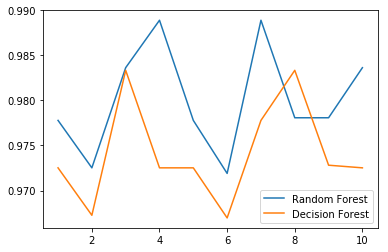

In [33]:
rfc_l=[]
clf_l=[]
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    
    clf_l.append(clf_s)
    rfc_l.append(rfc_s)

plt.plot(range(1,11),rfc_l,label="Random Forest")
plt.plot(range(1,11),clf_l,label="Decision Forest")
plt.legend()

In [34]:
#25棵树中判错的可能性
import numpy as np
from scipy.special import comb
np.array([comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)]).sum()

0.00036904803455582827

In [37]:
rfc = RandomForestClassifier(n_estimators=20,random_state=2)
rfc = rfc.fit(Xtrain, Ytrain)

In [43]:
#随机森林的重要属性之一：estimators，查看森林中树的状况
rfc.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1872583848, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=794921487, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_wei

In [44]:
# for i in range(len(rfc.estimators_)):
#     print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212


In [45]:
#无需划分训练集和测试集
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
rfc = rfc.fit(wine.data,wine.target)

In [46]:
#重要属性oob_score_
rfc.oob_score_

0.9719101123595506

In [49]:
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain, Ytrain)
rfc.score(Xtest,Ytest)

1.0

In [50]:
rfc.feature_importances_

array([0.15264322, 0.02856915, 0.01653916, 0.03642299, 0.05681709,
       0.09375729, 0.16523587, 0.00666225, 0.01195722, 0.11945707,
       0.07554111, 0.15008265, 0.08631494])

In [51]:
rfc.apply(Xtest)

array([[ 5,  4,  8, ...,  8,  7,  7],
       [ 1,  9,  8, ...,  8,  7,  7],
       [ 1,  9,  8, ..., 21,  7,  7],
       ...,
       [11,  9,  3, ...,  3,  7,  4],
       [14, 14, 16, ...,  9, 14, 16],
       [ 5, 11, 11, ...,  9, 11, 11]], dtype=int64)

In [52]:
rfc.predict(Xtest)

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1,
       1, 1, 2, 2, 1, 0, 1, 1, 0, 1])

In [53]:
rfc.predict_proba(Xtest)

array([[0.08, 0.76, 0.16],
       [0.  , 0.96, 0.04],
       [0.08, 0.92, 0.  ],
       [0.  , 0.76, 0.24],
       [0.08, 0.76, 0.16],
       [0.  , 1.  , 0.  ],
       [0.16, 0.12, 0.72],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.96, 0.  , 0.04],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.8 , 0.2 , 0.  ],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.04, 0.96, 0.  ],
       [0.84, 0.16, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.04, 0.96, 0.  ],
       [0.04, 0.92, 0.04],
       [0.  , 1.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.64, 0.32, 0.04],
       [0.96, 0.04, 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.04, 0.04, 0.92],
       [0.  , 0.  , 1.  ],
       [0.08, 0.68, 0.24],
       [1.  , 0.  , 0.  ],
       [0.28, 0.52, 0.2 ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.96, 0.04, 0.  ],
 

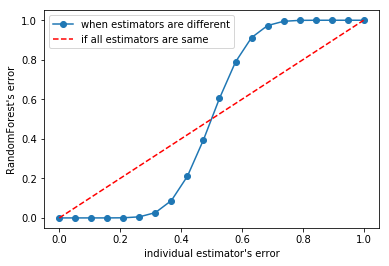

In [55]:
"""
基分类器的判断准确率至少要超过随机分类器，即时说，基分类器的判断准确率至少要超过50%。
"""
import numpy as np
x = np.linspace(0,1,20)
y = []
for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) for i in range(13,26)]).sum()
    y.append(E)
plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()

In [56]:
#回归

In [57]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [58]:
boston = load_boston()

In [59]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [60]:
regressor = RandomForestRegressor(n_estimators=100,
                                 random_state=0
                                 )
cross_val_score(regressor,boston.data,boston.target,cv=10,
               scoring="neg_mean_squared_error")#默认返回R^2
#返回10次结果

array([-10.72900447,  -5.36049859,  -4.74614178, -20.84946337,
       -12.23497347, -17.99274635,  -6.8952756 , -93.78884428,
       -29.80411702, -15.25776814])

In [61]:
#sklearn当中模型评估指标(打分列表)
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']